In [2]:
import matplotlib.pyplot as plt
import pandas as pd

song = pd.read_csv('songs_normalize.csv')

song

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [3]:
song.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

 # Qual a canção mais popular?

In [4]:
res=song[["song", "popularity"]]
res1=res.sort_values("popularity", ascending= False)
res1

,song,popularity
1322,Sweater Weather,89
1311,Another Love,88
201,Without Me,87
1613,Wait a Minute!,86
6,The Real Slim Shady,86
...,...,...
1637,Side To Side,0
217,Rock The Boat,0
1631,Cool Girl,0
1626,Sex,0


In [34]:
valor_max = res1["popularity"].max()
mais_popular=res1.loc[res1['popularity'] == valor_max, 'song'].iloc[0]

print("A musica mais popular é a: " + mais_popular)

A musica mais popular é a: Sweater Weather


### Qual a duração da música com maior duração?

In [6]:
max_time = song["duration_ms"].max()
segundos = max_time/1000
minutos = segundos/60
print("A música com maior duração é de: " + str(segundos) + "s" + " ou " + str(minutos) + "min")

A música com maior duração é de: 484.146s ou 8.0691min


Text(0, 0.5, 'Duração em ms')

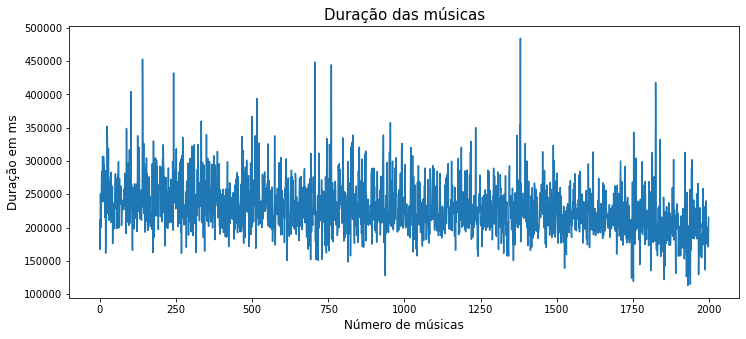

In [30]:
#Gráfico da duração das músicas.
fig, axs = plt.subplots(figsize = (12, 5))
song2 = song["duration_ms"].plot()
plt.title("Duração das músicas", fontsize=15)
plt.xlabel('Número de músicas', fontsize=12)
plt.ylabel('Duração em ms', fontsize=12)


### Qual o artista com mais músicas no "top hits"?

In [31]:
result = song.groupby("artist").count()
ordem=result["song"].sort_values(ascending=False)
artistamais=ordem.index[0]
artistamais
print("O artista com mais musicas é: " + artistamais)

O artista com mais musicas é: Rihanna


### Qual o número de músicas no top hits do artista com mais músicas?

In [82]:
result = song.groupby("artist").count()
ordem=result["song"].sort_values(ascending=False)
num=ordem.iloc[0]
print("A " + artistamais + " tem " + str(num) + " músicas no top hits!")

A Rihanna tem 25 músicas no top hits!


### Quantas músicas existem com conteúdo explicit?

In [80]:
result = song.groupby("explicit").count()
result

,artist,song,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
explicit,,,,,,,,,,,,,,,,,
False,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
True,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551


In [81]:
nummusicasexp=result.iloc[1]["song"]

print("Existem " + str(nummusicasexp) + " músicas com o conteúdo explicit." )


Existem 551 músicas com o conteúdo explicit.
